# Stage One: Collect and import ten documents

This is a continuation of my work from last week, where I used the AO3 scraper (https://github.com/radiolarian/AO3Scraper) to create a .csv of ten fanfiction texts and then used pandas to isolate the titles and body of the csv. I then used the titles to name the files, created files from the body text, and gethered them into a folder. 

In [3]:
import pandas as pd
df = pd.read_csv('falcon.csv')
for index, data in df[["title", "body"]].iterrows():
    outname = "texts/" + data["title"] + ".txt"
    with open(outname, 'w', errors="replace") as out:
        out.write(data["body"])

# Stage Two: Using the topic modeling code as a starter, build a topic model of the documents

I imported os and numpy, directed to my new texts folder, counted the files in the corpus, and printed the file names. I then imported sci-kit learn and defined a document term matrix. I defined a number of topics and ensured it could be fit into the model. I then creared a dataframe with a column for every term in my document term matrix, and a row for each topic. I then printed a sample of the highest values terms from one of the topics. I then created a data frame of the distribution of topics in each document. I then created a word cloud from Topic 2 and displayed it. 

In [4]:
import os
import numpy as np

documents = []
path = 'texts/'

filenames=sorted([os.path.join(path, fn) for fn in os.listdir(path)])
print(len(filenames)) 
print(filenames[:10])

10
['texts/Between Technology, Magic and Death.txt', 'texts/Marriage Counseling for the Inept and Oblivious.txt', 'texts/My Two Front Teef.txt', 'texts/Skip, Reverse.txt', 'texts/The Gottman Method for Dealing with Conflict.txt', 'texts/Vacant Mirrors.txt', 'texts/come with me to somewhere new.txt', 'texts/diving blind.txt', 'texts/double dare.txt', "texts/just won't do right.txt"]


In [5]:
import sklearn.feature_extraction.text as text

vectorizer=text.CountVectorizer(input='filename', stop_words="english", min_df=1)
dtm=vectorizer.fit_transform(filenames).toarray() 

vocab=np.array(vectorizer.get_feature_names())

In [6]:
print(f'Shape of document-term matrix: {dtm.shape}. '
      f'Number of tokens {dtm.sum()}')

Shape of document-term matrix: (10, 14897). Number of tokens 139649


In [7]:
import sklearn.decomposition as decomposition
model = decomposition.LatentDirichletAllocation(
    n_components=100, learning_method='online', random_state=1)

In [8]:
document_topic_distributions = model.fit_transform(dtm)

In [9]:
vocabulary = vectorizer.get_feature_names()
assert model.components_.shape == (100, len(vocabulary))
assert document_topic_distributions.shape == (dtm.shape[0], 100)

In [10]:
topic_names = [f'Topic {k}' for k in range(100)]
topic_word_distributions = pd.DataFrame(
    model.components_, columns=vocabulary, index=topic_names)
print(topic_word_distributions)

                00       000       001       002       003       004  \
Topic 0   0.237354  0.192613  0.193687  0.183563  0.240142  0.189307   
Topic 1   0.194107  0.211293  0.225390  0.197431  0.192878  0.179416   
Topic 2   0.211007  0.205029  0.185801  0.214297  0.210515  0.187434   
Topic 3   0.216145  0.220024  0.210610  0.232974  0.212151  0.199982   
Topic 4   0.225881  0.181110  0.197641  0.248968  0.213114  0.199261   
...            ...       ...       ...       ...       ...       ...   
Topic 95  0.229426  0.213044  0.220292  0.204179  0.221758  0.184067   
Topic 96  0.229644  0.216388  0.232584  0.189452  0.200130  0.208707   
Topic 97  0.211588  0.196273  0.209774  0.196296  0.234489  0.201328   
Topic 98  0.231191  0.233200  0.210413  0.177161  0.189181  0.161103   
Topic 99  0.203171  0.167964  0.195564  0.178284  0.187613  0.241144   

               005       006       007       008  ...   zipping      zola  \
Topic 0   0.233985  0.166160  0.227395  0.183159  ...  0.1

In [12]:
topic_word_distributions.loc['Topic 98'].sort_values(ascending=False).head(18)

harry     0.585741
tony      0.567446
like      0.565784
bucky     0.561874
pepper    0.406303
face      0.405213
just      0.395172
didn      0.381695
make      0.379376
eyes      0.374153
way       0.370718
stark     0.343552
got       0.336048
looked    0.335964
darcy     0.333431
think     0.330695
really    0.329810
time      0.329072
Name: Topic 98, dtype: float64

In [13]:
document_topic_distributions = pd.DataFrame(
    document_topic_distributions, columns=topic_names)
print(document_topic_distributions)

        Topic 0       Topic 1       Topic 2       Topic 3       Topic 4  \
0  1.978944e-07  1.978944e-07  1.978944e-07  1.978944e-07  1.978944e-07   
1  3.432887e-06  3.432887e-06  3.432887e-06  3.432887e-06  3.432887e-06   
2  2.286655e-07  2.286655e-07  2.286655e-07  2.286655e-07  2.286655e-07   
3  2.571355e-06  2.571355e-06  2.571355e-06  2.571355e-06  2.571355e-06   
4  5.344735e-06  5.344735e-06  5.344735e-06  5.344735e-06  5.344735e-06   
5  4.338018e-07  4.338018e-07  4.338018e-07  4.338018e-07  4.338018e-07   
6  1.567398e-05  1.567398e-05  1.567398e-05  1.567398e-05  1.567398e-05   
7  1.917546e-06  1.917546e-06  1.917546e-06  1.917546e-06  1.917546e-06   
8  2.494388e-06  2.494388e-06  2.494388e-06  2.494388e-06  2.494388e-06   
9  2.626050e-06  2.626050e-06  2.626050e-06  2.626050e-06  2.626050e-06   

        Topic 5       Topic 6       Topic 7       Topic 8       Topic 9  ...  \
0  1.978944e-07  1.978944e-07  1.978944e-07  1.978944e-07  1.978944e-07  ...   
1  3.432887e-0

In [20]:
words = topic_word_distributions.loc['Topic 6'].sort_values(ascending=False).head(18)
words

bucky     0.594108
like      0.522341
tony      0.509186
just      0.465763
harry     0.441406
head      0.429017
know      0.416696
darcy     0.398975
hand      0.388576
don       0.375994
sam       0.370719
didn      0.369742
time      0.352272
people    0.350018
steve     0.348417
way       0.347979
man       0.334534
said      0.332871
Name: Topic 6, dtype: float64

00      0.211007
000     0.205029
001     0.185801
002     0.214297
003     0.210515
004     0.187434
005     0.204243
006     0.203377
007     0.210171
008     0.197209
009     0.224116
01      0.212745
06      0.202151
07      0.195380
08      0.196066
10      0.228211
100     0.202961
100k    0.203700
101     0.177859
106     0.201445
Name: Topic 2, dtype: float64


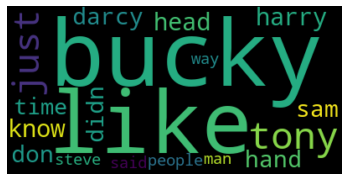

In [22]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

print(topic_word_distributions.loc['Topic 2'].head(20))

wordcloud = WordCloud().generate_from_frequencies(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Stage Three: Using the sentiment analysis code as a starter, run a sentiment analysis on sample fragments from the documents and compare

From the natural language toolkit, I imported the sentiment analyzer and chose a chunk of text to analyze defining it as the message text. I then called the polarity_scores method on sid and passed in the message_text to output a dictionary with negative, neutral, positive, and compound scores for the input text. I then imported the sentiment analyzer for sentence-level analysis. I then initialized VADER and pickle. I then chose a paragraph of text to break up into strings of sentences, and calculated the polatrity score for each sentence. 

In [23]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/Rachel/nltk_data...
[nltk_data] Downloading package punkt to /Users/Rachel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

message_text = '''Working so close with Tony Stark had not been what Pepper Potts had envisioned herself doing when she took the job in the accountancy department at Stark Industries, some years ago. She had come to America at 19, enrolled into a well-respected college and majored in accountancy, with a minor in Law. All paid for by her best friend in England. Soon after ending her education, she had seen a chance in starting at the finance department at Stark Industries, and which just graduated youngster wouldn't jump on that chance; not only did it pay well, SI was known for their excellent Personnel policy: dental and hospital insurance for one. Now 5 years after accepting her job in SI, and 3 years after becoming Tone Stark Personal assistant, she felt confident in being both the billionaire's employee but also his friend. She knew from experience just how difficult it can be to live with such fame, her best friend had the same problem, and she had seen what it did to him, at times.'''

In [25]:
print(message_text)

scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

Working so close with Tony Stark had not been what Pepper Potts had envisioned herself doing when she took the job in the accountancy department at Stark Industries, some years ago. She had come to America at 19, enrolled into a well-respected college and majored in accountancy, with a minor in Law. All paid for by her best friend in England. Soon after ending her education, she had seen a chance in starting at the finance department at Stark Industries, and which just graduated youngster wouldn't jump on that chance; not only did it pay well, SI was known for their excellent Personnel policy: dental and hospital insurance for one. Now 5 years after accepting her job in SI, and 3 years after becoming Tone Stark Personal assistant, she felt confident in being both the billionaire's employee but also his friend. She knew from experience just how difficult it can be to live with such fame, her best friend had the same problem, and she had seen what it did to him, at times.
compound: 0.974

In [26]:
import nltk.data
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize

sid = SentimentIntensityAnalyzer()

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

message_text = '''"Are you and uncle Sam married?" It's AJ who asks, with his mouth full of food and pointing at Bucky with his fork. Sarah chokes on her water and Bucky's eyes divert to Sam, who looks back with wide eyes. There is a small smile playing on his lips, though, and Bucky feels his face heat up. He turns to the boy, clears his throat and shakes his head. "Uh, no, we're not." AJ looks... disappointed? He is frowning with his whole face, still watching Bucky. "What do you mean?" And what the hell is Bucky supposed to answer that? Sam is shaking with laughter next to him and Sarah is still coughing and Bucky wants to disappear under the table away from the prying eyes.'''

sentences = tokenizer.tokenize(message_text)

for sentence in sentences:
        print(sentence)
        scores = sid.polarity_scores(sentence)
        for key in sorted(scores):
                print('{0}: {1}, '.format(key, scores[key]), end='')
        print()



"Are you and uncle Sam married?"
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
It's AJ who asks, with his mouth full of food and pointing at Bucky with his fork.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Sarah chokes on her water and Bucky's eyes divert to Sam, who looks back with wide eyes.
compound: -0.4588, neg: 0.158, neu: 0.842, pos: 0.0, 
There is a small smile playing on his lips, though, and Bucky feels his face heat up.
compound: 0.5106, neg: 0.0, neu: 0.765, pos: 0.235, 
He turns to the boy, clears his throat and shakes his head.
compound: 0.0772, neg: 0.0, neu: 0.894, pos: 0.106, 
"Uh, no, we're not."
compound: -0.296, neg: 0.423, neu: 0.577, pos: 0.0, 
AJ looks... disappointed?
compound: -0.4767, neg: 0.608, neu: 0.392, pos: 0.0, 
He is frowning with his whole face, still watching Bucky.
compound: -0.34, neg: 0.211, neu: 0.789, pos: 0.0, 
"What do you mean?"
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
And what the hell is Bucky supposed to answer that?
compound: -0.68

# Stage Four: Using the Markov chain code as a starter, generate a sentence using one of the documents

I imported markovify and used one of the fanfictions, "Diving Blind" to generate a random sentence. 

In [27]:
import markovify
import random

In [30]:
with open("texts/diving blind.txt",encoding='utf-8') as f:
    text = f.read()

In [31]:
text_model = markovify.Text(text)

In [32]:
print( text_model.make_sentence() )

The colorful intro banner fades away to be careful, now, in all things.


# Stage Five: Using the Markov chain code as a starter, generate a longer text fragment using all of the documents

I read in all 10 documents from my folder, and generated a sentence using all of them. I then created a longer text fragment, with paragraph of 3 to 9 sentences up to 500 words. 

In [34]:
import os
path = 'texts/'
with os.scandir(path) as entries:
    for entry in entries:
        print(entry.name)
        f = open(f'{path}/{entry.name}',encoding='utf-8')
        text += f.read()

Vacant Mirrors.txt
diving blind.txt
The Gottman Method for Dealing with Conflict.txt
My Two Front Teef.txt
just won't do right.txt
Marriage Counseling for the Inept and Oblivious.txt
Skip, Reverse.txt
double dare.txt
come with me to somewhere new.txt
Between Technology, Magic and Death.txt


In [35]:
text_model = markovify.Text(text)
print( text_model.make_sentence() )

She was my baby since last Christmas; let's see if Happy's in the comments section, no matter how many people around them both.


In [36]:
novel = ''
while (len( novel.split(" ")) < 500):
  for i in range(random.randrange(3,9)):
    novel += text_model.make_sentence() + " "
  novel += "\n\n"

print(novel)

A long time ago now, since he and Steve was in his throat. And he might have to tell them that could be finished in time would set the parameters by which I know they could see police boats closing in on it were in the side of his confusion to Sam that Bucky doesn't quite understand, but Sam is certainly making it so many people already, he didn't arrive late to his office and coming back to the spare room. He immediately felt bad when you'd tried to come up with what had caused the explosion to occur, taking out his own products, as well as Sirius would have to wait for the dry cereal you've been nursing for months looks happy. All three of them wondering however, how it would guarantee similar results. Miss Nat said a lot like you always do, with respectful awe. Out in the multiverse. Sam's sudden snort of laughter is strong enough to leave room for realization. 

He's smiling in that oil-stained white t-shirt, the way you sigh and turn to Harry, the Brit explained what had happened 